# 비원형 데이터워 군집화 - DBSCAN
---
- 분할적 군집화 방식
- 밀도(데이터의 밀집)기반 군진화 ==> 미리 군집수 지정 필요 없음
- 다양한 형태의 데이터에서 군집화 가능
- 이상치 데이터 제거도 가능함
- 군집을 정하는 기준
    - 임의의 점(Point)에서 지정된 거리만큼 영역안에 지정된 데이터 수 존재 여부
    - 하이퍼 파라미터 : 거리, 데이터수

## [1] 데이터 로딩

In [9]:
import tensorflow as tf

In [16]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = load_iris()

In [6]:
data = iris.data

In [7]:
target = iris.target

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## [2] 데이터 전처리

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [12]:
data_scaled = ss.fit_transform(data)

In [13]:
data_scaled[:,2]

array([-1.34022653, -1.34022653, -1.39706395, -1.2833891 , -1.34022653,
       -1.16971425, -1.34022653, -1.2833891 , -1.34022653, -1.2833891 ,
       -1.2833891 , -1.22655167, -1.34022653, -1.51073881, -1.45390138,
       -1.2833891 , -1.39706395, -1.34022653, -1.16971425, -1.2833891 ,
       -1.16971425, -1.2833891 , -1.56757623, -1.16971425, -1.05603939,
       -1.22655167, -1.22655167, -1.2833891 , -1.34022653, -1.22655167,
       -1.22655167, -1.2833891 , -1.2833891 , -1.34022653, -1.2833891 ,
       -1.45390138, -1.39706395, -1.34022653, -1.39706395, -1.2833891 ,
       -1.39706395, -1.39706395, -1.39706395, -1.22655167, -1.05603939,
       -1.34022653, -1.22655167, -1.34022653, -1.2833891 , -1.34022653,
        0.53540856,  0.42173371,  0.64908342,  0.13754657,  0.47857113,
        0.42173371,  0.53540856, -0.26031542,  0.47857113,  0.08070915,
       -0.14664056,  0.25122143,  0.13754657,  0.53540856, -0.08980313,
        0.36489628,  0.42173371,  0.194384  ,  0.42173371,  0.08

## [3] 군집화
---

In [18]:
# 군집화 객체 생성
dbscan = DBSCAN(eps=0.6, min_samples=8)

In [19]:
# iris 데이터를 분류
irisDBS = dbscan.fit(data_scaled)

In [24]:
irisDBS.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [23]:
irisDBS.components_.shape

(88, 4)

In [42]:
irisDBS.fit_predict(data_scaled)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [49]:
irisDBS.fit_predict(data_scaled).shape

(150,)

In [48]:
target.shape

(150,)

In [36]:
preDF=pd.DataFrame(irisDBS.fit_predict(data_scaled),columns=['pred'])
targetDF=pd.DataFrame(target,columns=['target'])

In [40]:
pd.concat((preDF,targetDF),axis=1)

,pred,target
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,1,2
146,1,2
147,1,2
148,1,2


In [58]:
dataDF = pd.DataFrame(data,columns=[iris.feature_names])
dataDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
dataDF = pd.concat((dataDF,preDF),axis=1)
dataDF.head()

,"(sepal length (cm),)","(sepal width (cm),)","(petal length (cm),)","(petal width (cm),)",pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
dataDF[dataDF['pred']==0].iloc[:,0]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: (sepal length (cm),), dtype: float64

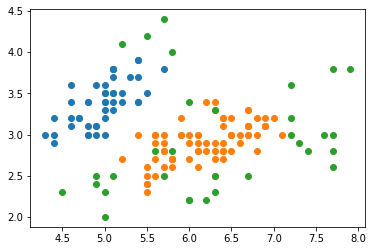

In [76]:
plt.scatter(dataDF[dataDF['pred']==0].iloc[:,0],dataDF[dataDF['pred']==0].iloc[:,1])
plt.scatter(dataDF[dataDF['pred']==1].iloc[:,0],dataDF[dataDF['pred']==1].iloc[:,1])
plt.scatter(dataDF[dataDF['pred']==-1].iloc[:,0],dataDF[dataDF['pred']==-1].iloc[:,1])

In [53]:
preDF.max()

pred    1
dtype: int64

In [77]:
!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled,target,test_size=0.2,random_state=42)

In [84]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [96]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
def get_model(hidden_layer_dim, meta):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    n_classes_ = meta["n_classes_"]

    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_features_in_, input_shape=X_shape_[1:]))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(hidden_layer_dim))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(n_classes_))
    model.add(keras.layers.Activation("softmax"))
    return model

clf = KerasClassifier(
    get_model,
    loss="sparse_categorical_crossentropy",
    hidden_layer_dim=100,
)

clf.fit(X, y)
y_proba = clf.predict_proba(X)

In [126]:
def get_model2(n_hidden,n_neurons,learning_rate):
    model=Sequential()
    model.add(Dense(512,input_shape=(4,),activation='relu'))
    model.add(Dense(218,activation='relu'))
    model.add(Dense(3,activation='softmax'))

    return model

In [127]:
clf=KerasClassifier(get_model2,loss='sparse_categorical_crossentropy',n_hidden=1,n_neurons=30,learning_rate=0.003)

In [128]:
clf.fit(x_train,y_train)

3/3 [==============================] - 0s 3ms/step - loss: 0.8820


KerasClassifier(
	model=<function get_model2 at 0x0000018B4A2FE4C0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=sparse_categorical_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=1
	n_neurons=30
	learning_rate=0.003
	class_weight=None
)

In [130]:
xproba = clf.predict_proba(x_train)

3/3 [==============================] - 0s 1ms/step


In [132]:
params = {
    "hidden_layer_dim": [50, 100, 200],
    "loss": ["sparse_categorical_crossentropy"],
    "optimizer": ["adam", "sgd"],
    "optimizer__learning_rate": [0.0001, 0.001, 0.1],
}
gs = GridSearchCV(clf, params, refit=False, cv=3, scoring='accuracy')

gs.fit(x_train, y_train)

ValueError: Invalid parameter hidden_layer_dim for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(hidden_layer_dim=50)`
Check the list of available parameters with `estimator.get_params().keys()`